In [72]:
'''
If you are using Google Colab, uncomment the next lines to download fast text and datasets
'''

!pip install fasttext
!wget https://raw.githubusercontent.com/L3peha/internshipVK/main/raw/test_spam.csv
!wget https://raw.githubusercontent.com/L3peha/internshipVK/main/raw/train_spam.csv

--2024-05-03 09:24:34--  https://raw.githubusercontent.com/L3peha/internshipVK/main/raw/test_spam.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1341081 (1.3M) [text/plain]
Saving to: ‘test_spam.csv.1’

test_spam.csv.1     100%[===================>]   1.28M  --.-KB/s    in 0.04s   

2024-05-03 09:24:35 (33.9 MB/s) - ‘test_spam.csv.1’ saved [1341081/1341081]

--2024-05-03 09:24:35--  https://raw.githubusercontent.com/L3peha/internshipVK/main/raw/train_spam.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5399880 (5.1M) [tex

In [73]:
import fasttext

In [74]:
#help(fasttext.FastText)

In [75]:
'''
import pandas as pd

df = pd.read_csv("train_spam.csv")
#print(type(df))
df.loc[df["text_type"]=="ham", "text_type"] = "__label__ham"
df.loc[df["text_type"]=="spam", "text_type"] = "__label__spam"
#con = str(df(header=False, index=False))
#print(con, file = open('temp.txt', 'w'))
df.to_csv("temp.csv", index=False, header=False)
'''

'\nimport pandas as pd\n\ndf = pd.read_csv("train_spam.csv")\n#print(type(df))\ndf.loc[df["text_type"]=="ham", "text_type"] = "__label__ham"\ndf.loc[df["text_type"]=="spam", "text_type"] = "__label__spam"\n#con = str(df(header=False, index=False))\n#print(con, file = open(\'temp.txt\', \'w\'))\ndf.to_csv("temp.csv", index=False, header=False)\n'

In [76]:
'''
import csv
with open('train.txt', "w") as f_out:
    with open('temp.csv', "r") as f_in:
        [ f_out.write(" ".join(row)+'\n') for row in csv.reader(f_in)]
    f_out.close()
'''

'\nimport csv\nwith open(\'train.txt\', "w") as f_out:\n    with open(\'temp.csv\', "r") as f_in:\n        [ f_out.write(" ".join(row)+\'\n\') for row in csv.reader(f_in)]\n    f_out.close()\n'

In [77]:
'''
with open('train_spam.csv', 'r') as f_in, open('tempp.txt', 'w') as f_out:
  cont = f_in.read().replace('ham,','__label__ham ')
  cont = f_in.read().replace('spam,','__label__spam ')
  f_out.write(cont)
'''

"\nwith open('train_spam.csv', 'r') as f_in, open('tempp.txt', 'w') as f_out:\n  cont = f_in.read().replace('ham,','__label__ham ')\n  cont = f_in.read().replace('spam,','__label__spam ')\n  f_out.write(cont)\n"

In [78]:
#!cat train.txt | sed -e "s/\([.\!?,'/()]\)/ \1 /g" | tr "[:upper:]" "[:lower:]" > train.txt

In [79]:
#!wc train.txt

In [80]:
'''
!head -n 13280 train.txt > spam.train
!tail -n 3000 train.txt > spam.valid
'''

'\n!head -n 13280 train.txt > spam.train\n!tail -n 3000 train.txt > spam.valid\n'

In [81]:
'''
model = fasttext.train_supervised(input = "spam.train")
model.save_model("spam.bin")
model.test("spam.valid")
'''

'\nmodel = fasttext.train_supervised(input = "spam.train")\nmodel.save_model("spam.bin")\nmodel.test("spam.valid")\n'

In [82]:
'''
model1 = fasttext.train_supervised(input = "spam.train", lr=1.0, epoch=25)
print(model1.test("spam.valid"))
'''

'\nmodel1 = fasttext.train_supervised(input = "spam.train", lr=1.0, epoch=25)\nprint(model1.test("spam.valid"))\n'

In [83]:
#model.save_model("spam.bin")

In [84]:
#print(model.labels)

In [85]:
! pip install scikit-plot

In [86]:
#mod = fasttext.load_model("spam.bin")

In [87]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('train_spam.csv', delimiter=',', header=None).values
data = dataset[1:, 1]
target = dataset[1:, 0]


print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(16278,) (16278,)
(12208,) (12208,) (4070,) (4070,)


In [88]:
with open('TestX.txt', "w") as f_out:
  for i in range(len(X_test)):
    f_out.write("__label__" + y_test[i] + " " + X_test[i] +'\n')
  f_out.close()

with open('TrainX.txt', "w") as f_out:
  for i in range(len(X_train)):
    f_out.write("__label__" + y_train[i] + " " + X_train[i] +'\n')
  f_out.close()

In [89]:
model = fasttext.train_supervised(input = "TrainX.txt", lr=0.1)

In [90]:
import re

labels, probabilities = model.predict([re.sub('\n', ' ', i) for i in X_test])
#probabilities = np.resize(np.array(probabilities),[len(y_test),1])
#probabilities = np.array(probabilities)
#print(probabilities)
#print(y_test)


In [91]:
temp = []
#print(labels[0])
#print([labels[i] for i in range(10)])
for i in range(len(y_test)):
  if labels[i]!=['__label__spam']:
    temp.append([probabilities[i], (1-probabilities[i])])
  else:
    temp.append([(1-probabilities[i]), probabilities[i]])
#print((temp))
probabilities = np.resize(np.array(temp),[len(y_test),2])
print((probabilities))
print(y_test)

[[ 9.9501753e-01  4.9824715e-03]
 [ 9.9532747e-01  4.6725273e-03]
 [ 4.7509056e-01  5.2490944e-01]
 ...
 [ 1.4286578e-01  8.5713422e-01]
 [ 9.9668980e-01  3.3102036e-03]
 [ 1.0000100e+00 -1.0013580e-05]]
['ham' 'ham' 'spam' ... 'ham' 'ham' 'spam']


In [92]:
for i in y_test:
  if i!='ham' and i!='spam':
    print(i)

In [93]:
posos = []
for i in probabilities:
  if i[0]>i[1]:
    posos.append(i[1])
  else:
    posos.append(i[0])

In [94]:
import sklearn
print(sklearn.metrics.roc_auc_score(y_test, posos))

0.6892326201892656


In [95]:
'''
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, probabilities))
'''

'\nfrom sklearn.metrics import roc_auc_score\nprint(roc_auc_score(y_test, probabilities))\n'

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

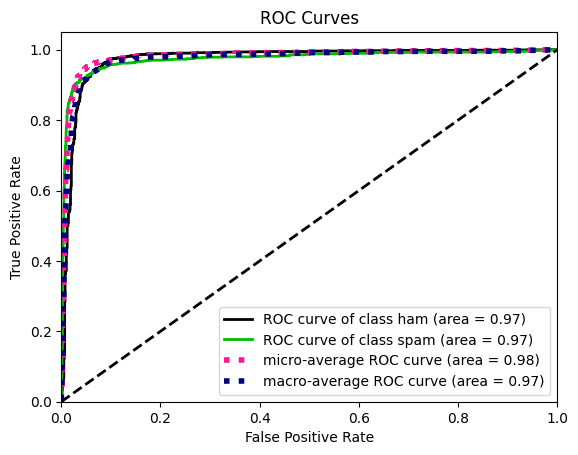

In [96]:
import scikitplot

#This function plots ROC curves for all classes and micro/macro average ROC curve

scikitplot.metrics.plot_roc(y_test, probabilities)

In [97]:
#!pip install spam-detector-ai

In [98]:
'''
import nltk

nltk.download('wordnet')
nltk.download('stopwords')
'''

"\nimport nltk\n\nnltk.download('wordnet')\nnltk.download('stopwords')\n"

In [99]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm

In [100]:
cv = CountVectorizer()
features = cv.fit_transform(X_train)

In [101]:
print(features.shape)

(12208, 45701)


In [102]:
model1 = svm.SVC(probability=True)
model1.fit(features,y_train)

SVC(probability=True)

In [103]:
features_test = cv.transform(X_test)
print(model1.score(features_test,y_test))

0.9343980343980344


In [104]:
#print(features_test)

In [105]:
print((model1.predict_proba(features_test)))

[[0.96458486 0.03541514]
 [0.99433776 0.00566224]
 [0.28826754 0.71173246]
 ...
 [0.09008495 0.90991505]
 [0.9955964  0.0044036 ]
 [0.98864227 0.01135773]]


In [106]:
temp = (model1.predict_proba(features_test))
posos = []
for i in temp:
  if i[0]>i[1]:
    posos.append(i[0])
  else:
    posos.append(i[1])



In [107]:
import sklearn
print(sklearn.metrics.roc_auc_score(y_test, posos))

0.5552830195311951


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

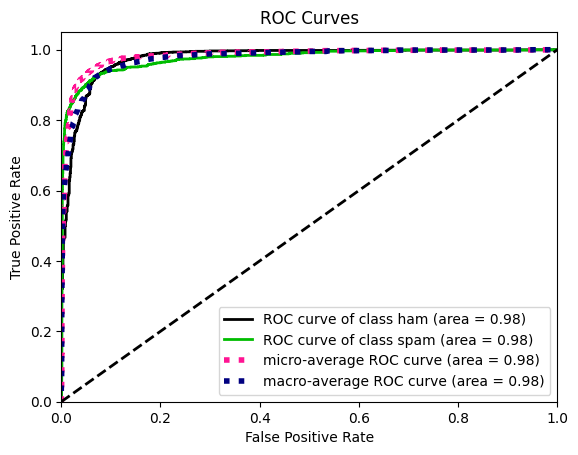

In [108]:
scikitplot.metrics.plot_roc(y_test, temp)

In [109]:
from sklearn.linear_model import LogisticRegression

cv = CountVectorizer()
features = cv.fit_transform(X_train)

lr_basic = LogisticRegression(solver='saga', tol=1e-3, max_iter=500).fit(features, y_train)

In [110]:
features_test = cv.transform(X_test)
print(y_test.shape)
print(lr_basic.predict_proba(features_test))

(4070,)
[[6.02437503e-01 3.97562497e-01]
 [9.99999464e-01 5.36354190e-07]
 [4.48684572e-01 5.51315428e-01]
 ...
 [2.11320431e-04 9.99788680e-01]
 [9.96270599e-01 3.72940148e-03]
 [7.01188872e-01 2.98811128e-01]]


In [111]:
temp = (lr_basic.predict_proba(features_test))
posos = []
for i in temp:
  if i[0]>i[1]:
    posos.append(i[1])
  else:
    posos.append(i[0])

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

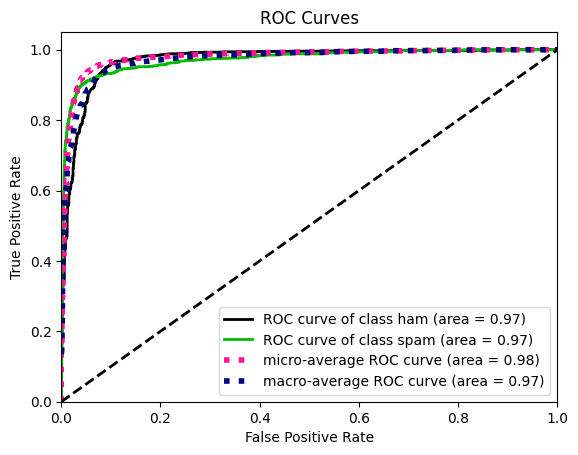

In [112]:
scikitplot.metrics.plot_roc(y_test, temp)

In [113]:
import sklearn
print(sklearn.metrics.roc_auc_score(y_test, posos))

0.5632765958444066
